# K means clustering
K means clustering is an unsupervised machine learning algorithm that is used for clustering similar data points in a data set

An unsupervised model has independant variables and no dependant variables (unlike linear and logistic regression). Meaning data is represented without labels

The aim is to segment a dataset into 'k' distionct clusters, where 'k' is predefined and chosen by user

k-means can typically be applied to data that has a smaller number of dimensions, is numeric, and is continuous. Think of a scenario in which you want to make groups of similar things from a randomly distributed collection of things. For example, usage can be found in customer segregation, cluster similar traffic data together, image segmentation, anomoly detection and more

## How to calculate the similarity of clusters?
The algorithm makes use of Euclidean distance to minimize distances within clusters in every iteration,
$$
\sqrt{(X_1 - X_2)^2 + (Y_1 - Y_2)^2}
$$

for 2D; formula can be extended to N dimensions


## Implementation

### Steps

1. Select initial K-means centroids
2. Calculate distance and find the closest centroid for a given data point
3. Compute the centroid means and update the centroids
4. Run algorithm till convergence
5. Plot results

In [119]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

### Generate random data

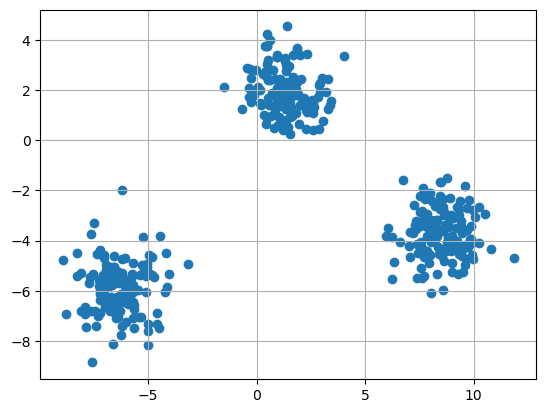

(400, 2)


In [120]:
X,y = make_blobs(n_samples=400, n_features=2, random_state=12345 ) #features here is the dimensionality of the data

plt.grid()
plt.scatter(X[:, 0], X[:,1])
plt.show()
print(X.shape)

### Build model

In [ ]:
class KMeansCluster:
    def __init__(self, k=3, max_epochs=100):
        self.k = k
        self.max_epochs = max_epochs
        self.centroids = None # no centroids calculated yet
        self.iters = []
    # for calculating euclidean distance
    def euclidean(self, points, centroids):
        return np.sqrt(np.sum((centroids - points)**2, axis=1))
    # for initialization of centroid
    def createCentroid(self, x): # I will be randomly assigning already present data points to be centroids, another method involves getting the min and max range of data and getting uniform centroids in the range
        n = x.shape[0]
        idxs = np.random.choice(n, self.k)
        return x[idxs]
    # assign the data to the nearest centroid
    def assignCentroid(self,x):
        #compute distances
        distances = np.array([self.euclidean(x, centroid) for centroid in self.centroids]).T
        # assign each point to closest centroid thereby creating clusters
        clusters = np.argmin(distances, axis=1)
        return np.array(clusters)
    
    # updates cluster centers based on the mean of assigned points in K-means clustering.
    def updateCentroid(self, x, assigned_cluster):
        for i in range(self.k):
            points_i = np.array(x[assigned_cluster == i])
            if len(points_i) > 0:
                self.centroids[i] = np.mean(points_i, axis=0)  # Normal case
            else:
                self.centroids[i] = x[np.random.choice(len(x))]  # Reinitialize randomly

    # fitting model to the data utilizing the previous steps for max_epochs
    def fit(self, x):
        # initialize the centroids
        self.centroids = self.createCentroid(x)
        # loop through the max_epochs
        for _ in range(self.max_epochs):
            # keep track of previous clusters/centroids
            prev = self.centroids.copy()
            self.iters.append(prev)
            # assign the centroids
            assigned = self.assignCentroid(x)
            # update the centroids
            self.updateCentroid(x, assigned)
        # if previous centroid/cluster == curr centroid/cluster, means no change, hence breaking from loop
            if np.allclose(prev, self.centroids):
                break

    # added methods to calculate distortion and inertia to identify optimal k value
    def distortion(self, data):
        assigned = self.assignCentroid(data)
        distance = np.sum((self.centroids[assigned] - data)**2, axis=1) # using euclidean distance formula
        return np.sum(distance) / len(data)
        

    def inertia(self, data):
        assigned = self.assignCentroid(data)
        distance = np.sum((self.centroids[assigned] - data)**2, axis=1)
        return np.sum(distance)

### Initialize Model

In [ ]:
kmeans = KMeansCluster(3)
kmeans.fit(X)

### Plot final cluster and centroid

[[-6.3124291  -5.88434016]
 [ 1.35045601  1.96372451]
 [ 8.49172361 -3.68604974]]


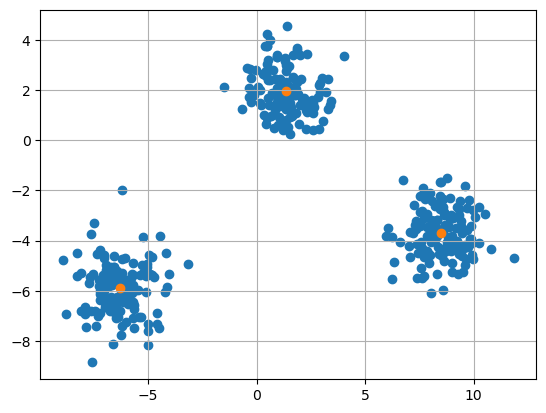

In [ ]:
centroids = kmeans.centroids
print(centroids)
plt.grid()
plt.scatter(X[:, 0], X[:,1]) # getting the row and column 
plt.scatter(centroids[:,0], centroids[:,1])
plt.show()

### Plot how the centroids were positioned

[array([[-5.6632845 , -7.48826026],
       [ 8.2422132 , -3.45453189],
       [ 8.17525745, -3.68949595]]), array([[-6.2350392 , -5.77230828],
       [ 3.75687023,  0.39486477],
       [ 8.32177479, -4.40443231]]), array([[-6.3124291 , -5.88434016],
       [ 1.35045601,  1.96372451],
       [ 8.49172361, -3.68604974]])]


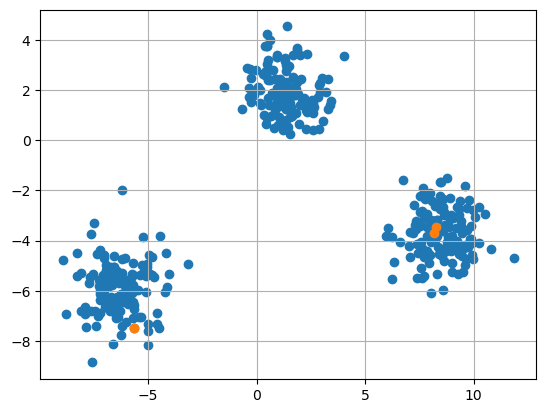

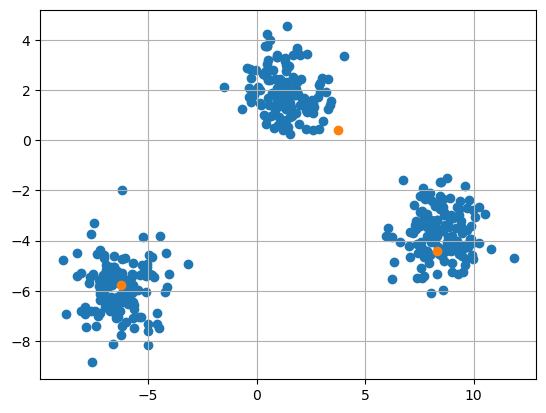

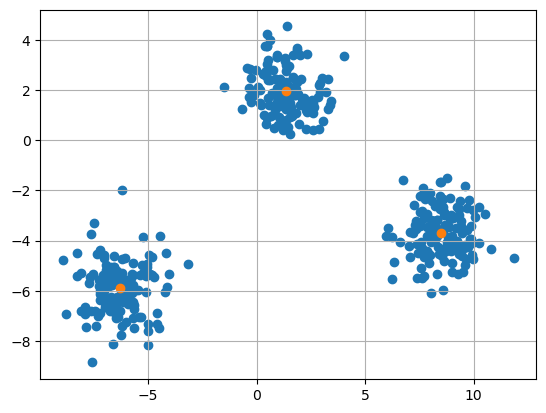

In [112]:
iterations = kmeans.iters
print(iterations)
for i in range(len(iterations)):
    plt.grid()
    plt.scatter(X[:, 0], X[:,1])
    plt.scatter(iterations[i][:,0], iterations[i][:,1])
    plt.show()

## How to find the optimal value of K?

Currently the user chooses a arbitrary K value to fit 'clusters' to the given. The elbow method is a more efficient and systematic technique of identifying the right K value. It does this by calculating the **Within-Cluster Sum of Squares** or **WCSS** for each k value

**WCSS** measures how well data points are clustered around the given centroid. It is defined as the sum of the squared distances between each point and its cluster centroid,

$$
\sum_{i=1}^{K_c}\sum_{j=1}^{N_c} distance(x_{j}^{(i)}, c_{i})^2
$$

where $distance(x_{j}^{(i)}, c_{i})$ is the distance between the $j^{th}$ datapoint in cluster i and the respective centroid $c_{i}$ in the cluster

As we increase the value of K, and plot the WCSS for each K value, an elbow shape is observed and the 'elbow' point is where we have found our optimal K value

## What is distortion and inertia?

Distortion and inertia are key metrics that help us evaluate the quality of groupings

**Distortion** is a measure of the average squared distance between each data point and its respective assigned cluster center (centeroid). It is basically a measure of how well the cluster represents the data. Low distortion equates better clustering

$$
\frac{1}{n} \sum_{i=1}^{n}distance(x_i, c_j)^2
$$
Where $x_i$ is the ith value in dataset x and $c_j$ is the centeroid of the cluster to which $x_i$ belongs

**Inertia** is a mesaure of the sum of the squared distances between each data to its closest centeroid and like Distortion, lower the inertia, better the clustering

$$
\sum_{i=1}^{n}distance(x_i, c_j)^2
$$

## Implementing the Elbow method

In [132]:
k_vals = range(1,10)
distortions = []
inertias = []
for val in k_vals:
    kmeansModel = KMeansCluster(val)
    kmeansModel.fit(X)
    distortions.append(kmeansModel.distortion(X))
    inertias.append(kmeansModel.inertia(X))

Text(0, 0.5, 'K values')

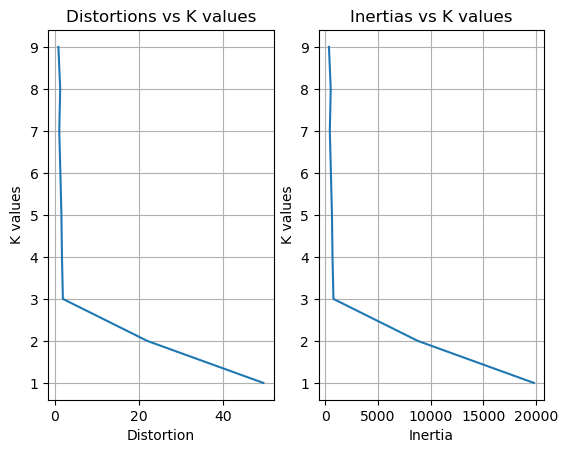

In [138]:
plt.subplot(1,2,1)
plt.grid()
plt.plot(distortions,k_vals)
plt.title('Distortions vs K values')
plt.xlabel('Distortion')
plt.ylabel('K values')

plt.subplot(1,2,2)
plt.grid()
plt.plot(inertias, k_vals)
plt.title('Inertias vs K values')
plt.xlabel('Inertia')
plt.ylabel('K values')

As we can see in the above plots, the optimal k point is found at the elbow point